In [1]:
from polymorph_s2df.devutils import *
from polymorph_num import ops
from polymorph_sketch.draw_api import draw, loss, distance_param, angle_param, point_param, debug_inner_node, real_param

In [2]:
def plot_dist(values, X, Y, bounds):
    _, ax2 = plt.subplots(layout="constrained")

    levels = jnp.linspace(-5, 5, 41)

    ax2.axis("equal")
    ax2.contourf(
        X,
        Y,
        values,
        levels=levels,
        cmap="PRGn",
        origin="lower",
        extent=[bounds[0], bounds[1], bounds[0], bounds[1]],
    )
    ax2.contour(
        X,
        Y,
        values,
        levels=levels,
        colors="k",
        origin="lower",
        extent=[bounds[0], bounds[1], bounds[0], bounds[1]],
    )


p0 (0.0, 0.0)
p1 (-4.371135631231482e-08, 0.9999992847442627)
p2 (1.1999993324279785, 0.9999992847442627)
p3 (5.960464477539062e-07, 0.999999463558197)
p0-p1 0.9999992847442627
p1-p2 1.1999993324279785
p2-p3 1.1999987363815308
p3-p0 0.999999463558197
p0^p1 90.0
p1^p2 0.0
p2^p3 179.99998474121094
p3^p0 -90.00003051757812


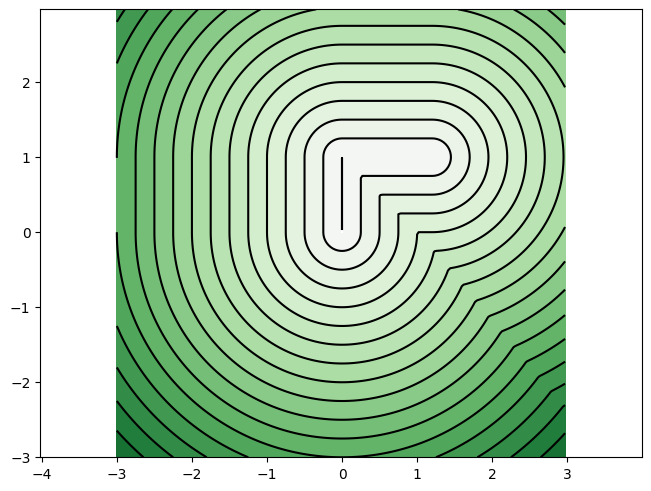

In [12]:
d = draw()
p0 = d.current_point
p1 = d.line().move_by_polar(90, distance_param()).current_point
p2 = d.line().horizontal_move_by(real_param()).current_point
p3 = d.line().move_by_polar(angle_param(), distance_param()).current_point
sketch = d.line().close()

unit = (loss()
    .fit_distance((p1 - p0).norm(), 1)
    .fit_distance((p2 - p1).norm(), 1.2)
    .fit_distance((p2 - p3).norm(), 1.2)
    .fit_angle((p3 - p2).direction(), 270)
    .create_unit())

n = 200
bounds = (-3, 3)
(grid_x, grid_y), (X, Y) = grids(200, bounds)
unit.register("distance", sketch.distance(grid_x, grid_y))

compiled = unit.compile()
c2 = compiled.minimize()

print("p0", c2.run(debug_inner_node(p0)))
print("p1", c2.run(debug_inner_node(p1)))
print("p2", c2.run(debug_inner_node(p2)))
print("p3", c2.run(debug_inner_node(p3)))

print("p0-p1", c2.run(debug_inner_node((p0 - p1).norm())))
print("p1-p2", c2.run(debug_inner_node((p2 - p1).norm())))
print("p2-p3", c2.run(debug_inner_node((p2 - p3).norm())))
print("p3-p0", c2.run(debug_inner_node((p0 - p3).norm())))

print("p0^p1", c2.run(debug_inner_node((p1 - p0).direction())))
print("p1^p2", c2.run(debug_inner_node((p2 - p1).direction())))
print("p2^p3", c2.run(debug_inner_node((p3 - p2).direction())))
print("p3^p0", c2.run(debug_inner_node((p0 - p3).direction())))

plot_dist(c2.evaluate("distance").reshape(200, 200), X, Y, bounds)

